# Table of Contents

* [Pipelines](#pipelines)
    * [Why should I use them?](#whypipelines)
    * [Example](#pipeexample)
* [Types of Classification](#classtypes)
    * [Binary Classification](#binary)
        * [Dataset for Binary Classification](#datasetbinary)
        * [Baseline for Comparison](#baselinebinary)
        * []()

# sci-kit learn's Pipelines

One useful feature that sci-kit learn has is the ability to chain together several operations that are cross-validated while setting different parameters. Each intermediate step in the pipeline is a transform, which may [clean](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing), [reduce](http://scikit-learn.org/stable/modules/unsupervised_reduction.html#data-reduction), [expand](http://scikit-learn.org/stable/modules/kernel_approximation.html#kernel-approximation), or [generate](http://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction) feature representations and must implement both `fit()` and `transform()` methods. The final step of the pipeline is an estimator, which can perform classification, regression, or clustering and only needs to call `fit()`.

## Why should I use them?

### Ease 
You only need to call `fit` and `predict` once on your data to fit a sequence of estimators.

### Parameter selection
You can [grid search](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) over parameters of all estimators in one step.

### Safety
Because Pipelines use cross-validation, data leakage is minimized.

## Example

In this example we will generate some synthetic data using sklearn's `make_blobs()` and plot the result to see what the data looks like.

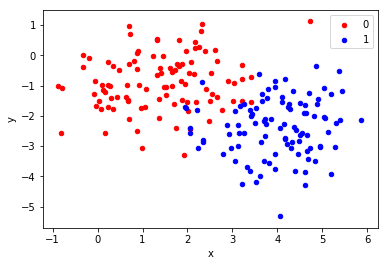

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_blobs(n_samples=200, centers = 2, n_features = 2) 
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

Once our data has been generated, we can create a Pipeline to scale and train our model.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train_example, X_test_example, y_train_example, y_test_example = train_test_split(X, y, test_size=0.2, random_state=0)

clf = make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(X_train_example, y_train_example)
pred_test = clf.predict(X_test_example)

print('{:.2%}\n'.format(accuracy_score(y_test_example, pred_test)))

90.00%



An accuracy score of 90% would normally be suspect, but since we are using a very small synthetic dataset with only two features, it's not really surprising that the accuracy would be as high as it is. We can add more steps to our Pipeline without sacrificing code readability.

### Adding Steps to a Pipeline

Since Pipelines work similarly to lists, we can add (and remove) steps from the Pipeline using the `.steps.append()` to append a step at the end of our Pipeline, or `.steps.insert()` to insert a step at a given position. If we want to remove a step, we can use the `.steps.pop(n)` to remove steps.

# Types of Classification

## Binary Classification

In binary classification, the goal is to predict between two possible class labels, predicting if an e-mail is spam or ham, would be an example of binary classification.

### Dataset for Binary Classification

The dataset we will be using for this example is the Wisconsin Breast Cancer dataset. Like the Boston Housing Prices dataset from the regression meeting, this dataset can be loaded from sci-kit learn using `load_breast_cancer()` function from sci-kit learn's datasets package.

In [3]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

Now that have the dataset loaded from sci-kit learn, let's use pandas to get more information about the dataset.

In [4]:
import pandas as pd
import numpy as np

cancer_df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = cancer_data['target']
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


We can see the data printed above, but that doesn't tell us very much about what the columns of data represent. Included in the data is the `DESCR` attribute, which when printed will give us a nicely formatted description of the columns of data in our dataset.

In [5]:
print(cancer_data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
print(cancer_df.groupby('target').size())

target
0    212
1    357
dtype: int64


### Train Test Split

Before we perform any cool machine learning functions with our data we need to make sure that it is split into smaller subsets, to guard against data "leaking" through and biasing our results. We will use sklearn's built in `train_test_split` function in `model_selection`.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.2, random_state=0)

### Baseline Comparison

Before applying any kind of pre-processing to the data, we should check what performance we are able to achieve without any additional work.

#### K-Fold Cross-Validation

In this example we are using 10-fold cross-validation (K = 10 in this case). This will split our set into 10 separate "pieces", with a different "piece" held out during each run. More information can be found [here](http://scikit-learn.org/stable/modules/cross_validation.html)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
import time

In [9]:
model_list = []
model_list.append(('Tree', DecisionTreeClassifier()))
model_list.append(('SVC', SVC()))
model_list.append(('KNN', KNeighborsClassifier()))
model_list.append(('NB', GaussianNB()))
model_list.append(('LR', LogisticRegression()))

#### Running the Baseline

In [52]:
num_folds = 10
results = []
names = []

for name, model in model_list:
    kfold = KFold(n_splits=num_folds, random_state=0)
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "{}: {:.5f} ({:.5f}) (run time: {:.5f})".format(name, cv_results.mean(), cv_results.std(), end-start))

Tree: 0.93850 (0.03878) (run time: 0.07223)
SVC: 0.63710 (0.05079) (run time: 0.10235)
KNN: 0.92527 (0.03131) (run time: 0.01291)
NB: 0.94512 (0.03408) (run time: 0.00873)
LR: 0.95169 (0.03491) (run time: 0.03902)


### Scaling the Dataset

With our baseline established, we can now look to see how applying a scaling factor to the dataset will affect the performance of the dataset. We will use pipelines to standardize the data and fit the model.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipelines = []
pipelines.append(('ScaledTree', Pipeline([('Scaler', StandardScaler()), ('Tree', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))

In [51]:
results = []
names = []

for name, model in pipelines:
    start = time.time()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( '{}: {:.5f} ({:.5f}) (run time: {:.5f})'.format(name, cv_results.mean(), cv_results.std(), end-start))

ScaledTree: 0.93420 (0.03760) (run time: 0.07306)
ScaledSVC: 0.97589 (0.02485) (run time: 0.04525)
ScaledKNN: 0.96705 (0.02249) (run time: 0.02362)
ScaledNB: 0.94517 (0.03548) (run time: 0.01943)
ScaledLR: 0.98024 (0.02497) (run time: 0.03043)


### Tuning a SVM Model

While we have achieved fairly high accuracy on the training set already, we can usually squeeze more performance out of a particular algorithm by tuning the hyperparameters of the algorithm. In this case we will use `GridSearchCV` and test different values of the parameter `C` along with the `kernel` hyperparameter.

In [14]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

Here we are specifying the values of `C` and the `kernel` that we would like to iterate over when we are doing our `GridSearchCV`. We then create a Python `dict` to create a grid that can be iterated over.

In [15]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

Next, we create the `Support Vector Classifier` object and the `KFold` object, along with the `GridSearchCV` object. We will pass the scaled `X_train` dataset and the unscaled target values. We can get the best results using the `best_score_` and `best_params_` attributes of `GridSearchCV`. We can then print this, along with mean, standard deviation and parameter value from each combination.

In [47]:
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: {:.5f} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{:.5f} ({:.5f}) with: {}".format(mean, stdev, param))

Best: 0.98022 using {'C': 0.5, 'kernel': 'linear'}
0.97802 (0.02186) with: {'C': 0.1, 'kernel': 'linear'}
0.82857 (0.03920) with: {'C': 0.1, 'kernel': 'poly'}
0.94505 (0.03113) with: {'C': 0.1, 'kernel': 'rbf'}
0.94725 (0.02431) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.97582 (0.02493) with: {'C': 0.3, 'kernel': 'linear'}
0.87253 (0.04379) with: {'C': 0.3, 'kernel': 'poly'}
0.95824 (0.02477) with: {'C': 0.3, 'kernel': 'rbf'}
0.95385 (0.02831) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.98022 (0.02296) with: {'C': 0.5, 'kernel': 'linear'}
0.88571 (0.03090) with: {'C': 0.5, 'kernel': 'poly'}
0.96923 (0.02435) with: {'C': 0.5, 'kernel': 'rbf'}
0.95385 (0.02075) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.97363 (0.02547) with: {'C': 0.7, 'kernel': 'linear'}
0.88571 (0.03360) with: {'C': 0.7, 'kernel': 'poly'}
0.97363 (0.02547) with: {'C': 0.7, 'kernel': 'rbf'}
0.95165 (0.02904) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.96923 (0.03116) with: {'C': 0.9, 'kernel': 'linear'}
0.89231 (0.02872) with: {'C': 

### Testing Our Models

Now that we have improved our model's performance on the training set, we should look at how well both our baseline models and our tuned SVM model does on our testing set. Since we scaled our training data, we need to apply the same scaling to our testing data.

In [53]:
X_test_scaled = scaler.transform(X_test)

We will use the same algorithms for the testing that we used in establishing our baseline. Since we used default parameters for the baseline, we will use them for testing as well.

In [63]:
model_tree = DecisionTreeClassifier().fit(rescaledX, y_train)
model_knn = KNeighborsClassifier().fit(rescaledX, y_train)
model_NB = GaussianNB().fit(rescaledX, y_train)
model_LR = LogisticRegression().fit(rescaledX, y_train)

print('Accuracy score: Tree: {:.5f}'. format(accuracy_score(model_tree.predict(X_test_scaled), y_test)))
print('Accuracy score: KNN: {:.5f}'. format(accuracy_score(model_knn.predict(X_test_scaled), y_test)))
print('Accuracy score: GaussianNB: {:.5f}'. format(accuracy_score(model_NB.predict(X_test_scaled), y_test)))
print('Accuracy score: LR: {:.5f}'. format(accuracy_score(model_LR.predict(X_test_scaled), y_test)))

Accuracy score: Tree: 0.91228
Accuracy score: KNN: 0.95614
Accuracy score: GaussianNB: 0.90351
Accuracy score: LR: 0.96491


We can create our SVM model using the best values from our use of `GridSearchCV`. Using this model we can test to see how well it performs on our test data. From here we can decide to use that model or select a new one.

In [58]:
model_svc = SVC(C= 0.5, kernel='linear')

model_svc.fit(rescaledX, y_train)

predictions = model_svc.predict(X_test_scaled)
print('Accuracy score: {:.5f}'.format(accuracy_score(predictions, y_test)))

Accuracy score: 0.96491


## Multi-Class Classification

Multi-class classification, on the other hand, the goal is to predict possible class labels on more than two possible class labels.

### Dataset for Multi-Class Classification

The dataset we will be using for the multi-class example is UCL Wine dataset, 

In [21]:
from sklearn.datasets import load_wine

wine_data = load_wine()

Much like the Binary Classification example, we will load the wine dataset into a pandas `DataFrame` so that we can get a better look at the data in question.

In [23]:
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data['target']
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Again, like our earlier dataset, we can use the `DESCR` attribute of the dataset to get more information about the dataset without having to look it up on an external website.

In [24]:
print(wine_data.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine_data.data, wine_data.target, 
                                                                        test_size=0.3, random_state=0)

## Baseline for Comparison

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold
import time

In [28]:
model_list = []
model_list.append(('Tree', DecisionTreeClassifier()))
model_list.append(('SVC', SVC()))
model_list.append(('KNN', KNeighborsClassifier()))
model_list.append(('NB', GaussianNB()))
model_list.append(('LR', LogisticRegression()))

#### Running the Baseline

In [49]:
num_folds = 10
results = []
names = []

for name, model in model_list:
    kfold = KFold(n_splits=num_folds, random_state=0)
    start = time.time()
    cv_results = cross_val_score(model, X_train_wine, y_train_wine, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "{}: {:.5f} ({:.5f}) (run time: {:.5f})".format(name, cv_results.mean(), cv_results.std(), end-start))

Tree: 0.86282 (0.11152) (run time: 0.01360)
SVC: 0.42372 (0.14432) (run time: 0.01750)
KNN: 0.65577 (0.19946) (run time: 0.01342)
NB: 0.96026 (0.05261) (run time: 0.02149)
LR: 0.95962 (0.04045) (run time: 0.04397)


### Scaling the Dataset

With our baseline established, we can now look to see how applying a scaling factor to the dataset will affect the performance of the dataset. We will use pipelines to standardize the data and fit the model.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipelines = []
pipelines.append(('ScaledTree', Pipeline([('Scaler', StandardScaler()), ('Tree', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))

In [50]:
results = []
names = []

for name, model in pipelines:
    start = time.time()
    cv_results = cross_val_score(model, X_train_wine, y_train_wine, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "{}: {:.5f} ({:.5f}) (run time: {:.5f})".format(name, cv_results.mean(), cv_results.std(), end-start))

ScaledTree: 0.88782 (0.11144) (run time: 0.01776)
ScaledSVC: 0.98397 (0.03208) (run time: 0.01841)
ScaledKNN: 0.97692 (0.04925) (run time: 0.01782)
ScaledNB: 0.96026 (0.05261) (run time: 0.01697)
ScaledLR: 0.95256 (0.06223) (run time: 0.02694)


### Testing our Models

Given that our models all perform reasonably well on our data and since we just did an example on tuning an SVM, we can go ahead and see how well our models perform on the test data. 

In [67]:
scaler = StandardScaler().fit(X_train_wine)
rescaledX_wine = scaler.transform(X_train_wine)
X_test_scaled_wine = scaler.transform(X_test_wine)

model_tree = DecisionTreeClassifier().fit(rescaledX_wine, y_train_wine)
model_knn = KNeighborsClassifier().fit(rescaledX_wine, y_train_wine)
model_NB = GaussianNB().fit(rescaledX_wine, y_train_wine)
model_LR = LogisticRegression().fit(rescaledX_wine, y_train_wine)
model_SVC = SVC().fit(rescaledX_wine, y_train_wine)

print('Accuracy score: Tree: {:.5f}'. format(accuracy_score(model_tree.predict(X_test_scaled_wine), y_test_wine)))
print('Accuracy score: SVM: {:.5f}'. format(accuracy_score(model_SVC.predict(X_test_scaled_wine), y_test_wine)))
print('Accuracy score: KNN: {:.5f}'. format(accuracy_score(model_knn.predict(X_test_scaled_wine), y_test_wine)))
print('Accuracy score: GaussianNB: {:.5f}'. format(accuracy_score(model_NB.predict(X_test_scaled_wine), y_test_wine)))
print('Accuracy score: LR: {:.5f}'. format(accuracy_score(model_LR.predict(X_test_scaled_wine), y_test_wine)))

Accuracy score: Tree: 0.92593
Accuracy score: SVM: 1.00000
Accuracy score: KNN: 1.00000
Accuracy score: GaussianNB: 0.94444
Accuracy score: LR: 1.00000
